# Differences between no canyon cases

Run03 and run04 have a straight shelf and fixed values for u and v at the east and west boundaries. These velocities come from a cross-shelf section in run42 (base case with no canyon,new viscosity) on day 3 of the simulation.

Additionally, run04 has initial T, S and Tr fields form day 3 run42. 

In this notebook we compare the results from both runs.

In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [2]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# State and ptracer files for runs with fixed boundaries and upwelling IC 
state_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run04/stateGlob.nc'
ptracers_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run04/ptracersGlob.nc'

state_01 = xr.open_dataset(state_file01)
ptracers_01 = xr.open_dataset(ptracers_file01)

# files for original run with only fixed boundaries
state_file_fb = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/stateGlob.nc' 
ptracers_file_fb = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run03/ptracersGlob.nc'

state_fb = xr.open_dataset(state_file_fb)
ptracers_fb = xr.open_dataset(ptracers_file_fb)

## What did the model read?

In [3]:
# Velocities
u_Wbdy_01 = state_01.U.isel(Xp1=0, T=0)
v_Wbdy_01 = state_01.V.isel(X=0, T=0)

u_Ebdy_01 = state_01.U.isel(Xp1=360, T=0)
v_Ebdy_01 = state_01.V.isel(X=359, T=0)


# Base case at day 3
u_Wbdy_fb = state_fb.U.isel(Xp1=0, T=6)
v_Wbdy_fb = state_fb.V.isel(X=0, T=6)

u_Ebdy_fb = state_fb.U.isel(Xp1=360, T=6)
v_Ebdy_fb = state_fb.V.isel(X=359, T=6)

# Tracers
Temp_01 = state_01.Temp.isel(X=180, T=0)
S_01 = state_01.S.isel(X=180, T=0)
Tr_01 = ptracers_01.Tr1.isel(X=180, T=0)


Temp_fb = state_fb.Temp.isel(X=180, T=6)
S_fb = state_fb.S.isel(X=180, T=6)
Tr_fb = ptracers_fb.Tr1.isel(X=180, T=6)


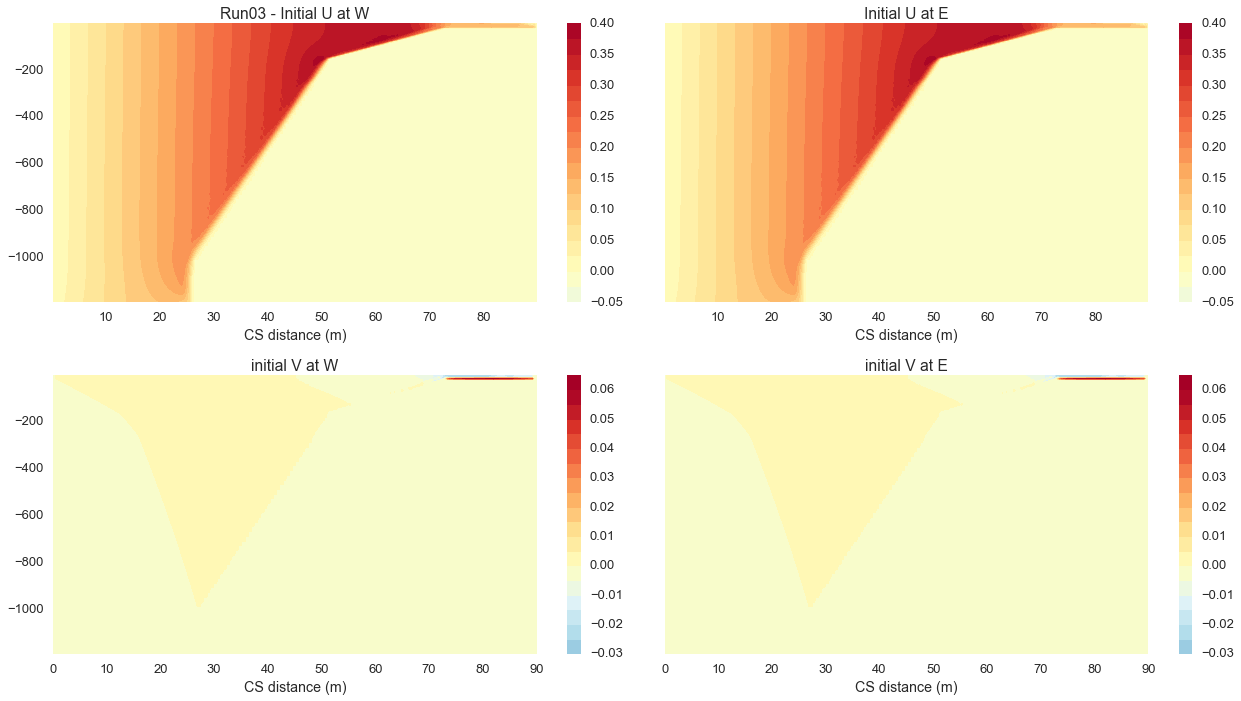

In [4]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_01,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Run03 - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_01,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_01,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_01,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


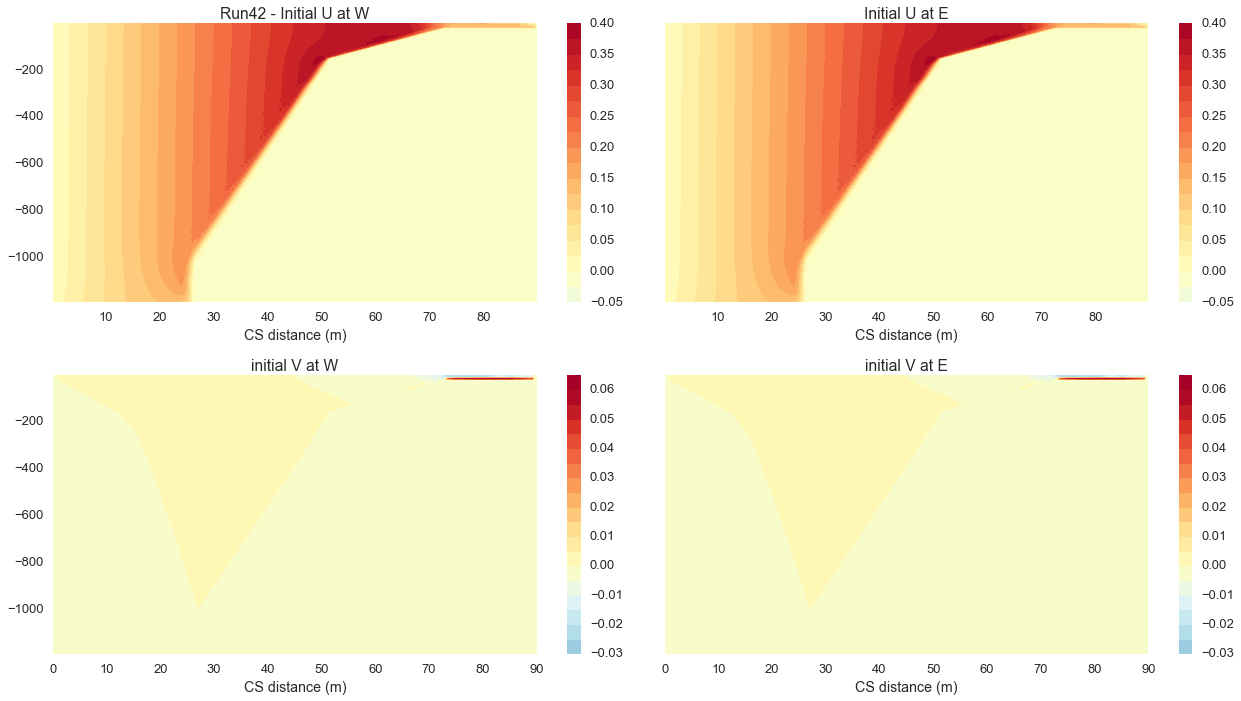

In [5]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_fb,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Run42 - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_fb,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_fb,20,
                       vmin=-0.4, vmax=0.4, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_fb,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


U and V at the boundaries for run42 at day 3. Below I plot the anomaly (run04 - run03).

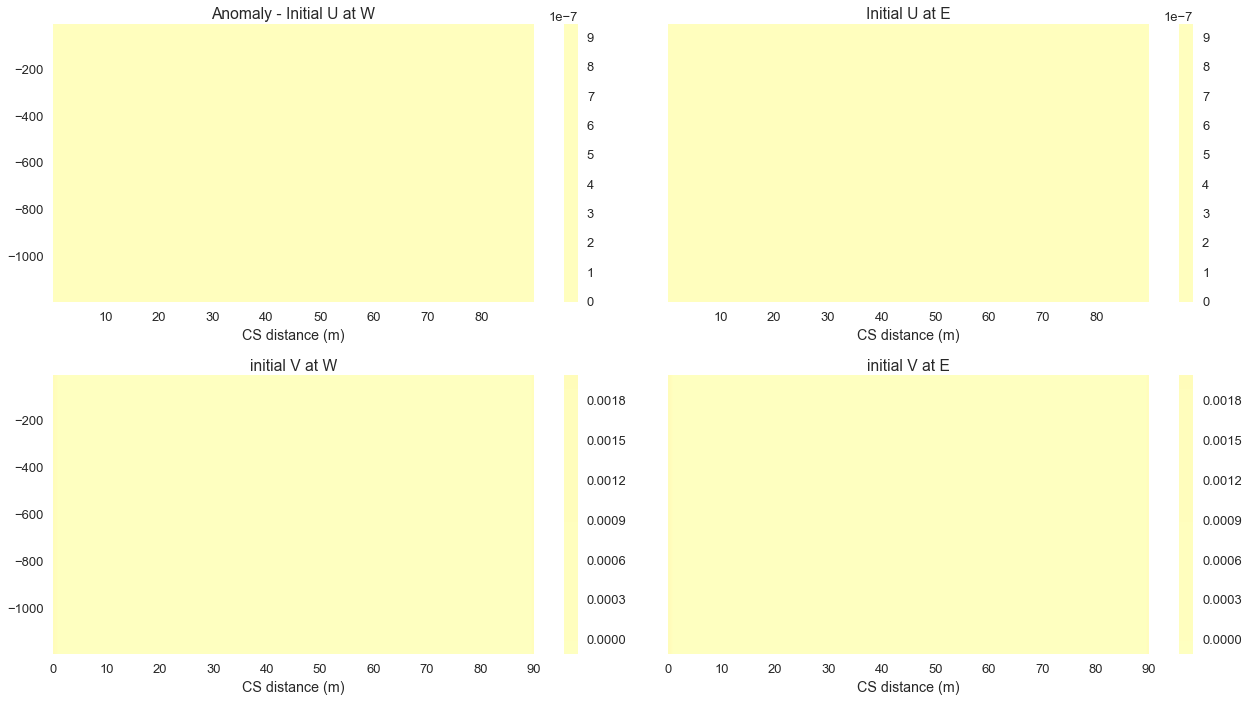

In [7]:
sns.set_context('talk')
fig,ax = plt.subplots(2,2,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_01-u_Wbdy_fb,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Anomaly - Initial U at W')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_01-v_Wbdy_fb,20,
                       vmin=-0.12, vmax=0.12, cmap = 'RdYlBu_r')
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('initial V at W')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[0,1].contourf(grid.Y/1000,grid.RC,u_Ebdy_01-u_Ebdy_fb,20,
                       vmin=-0.06, vmax=0.06, cmap = 'RdYlBu_r')
plt.colorbar(cf3,ax = ax[0,1])
ax[0,1].set_title('Initial U at E')
ax[0,1].set_xlabel('CS distance (m)')

cf4 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_01-v_Ebdy_fb,20,
                       vmin=-0.12, vmax=0.12, cmap = 'RdYlBu_r')
plt.colorbar(cf4,ax = ax[1,1])
ax[1,1].set_title('initial V at E')
ax[1,1].set_xlabel('CS distance (m)')

plt.tight_layout()


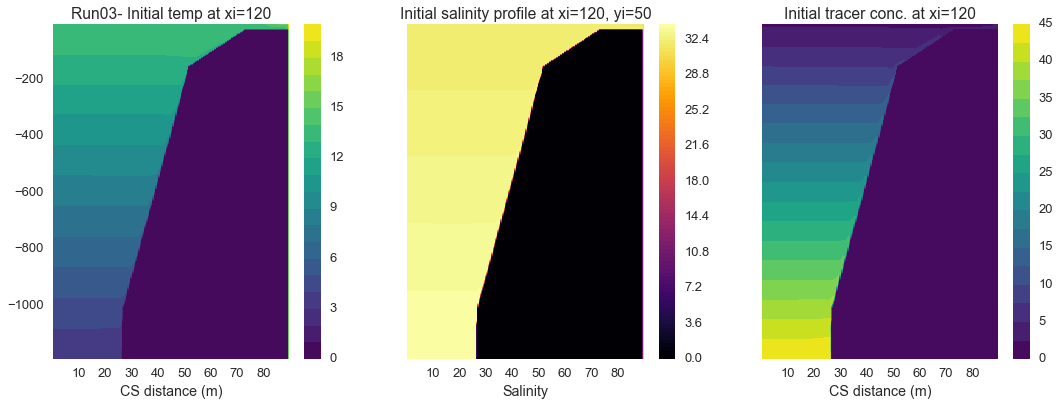

In [8]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_01,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Run03- Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Y/1000,grid.RC,S_01,100, cmap = 'inferno')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_01,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')



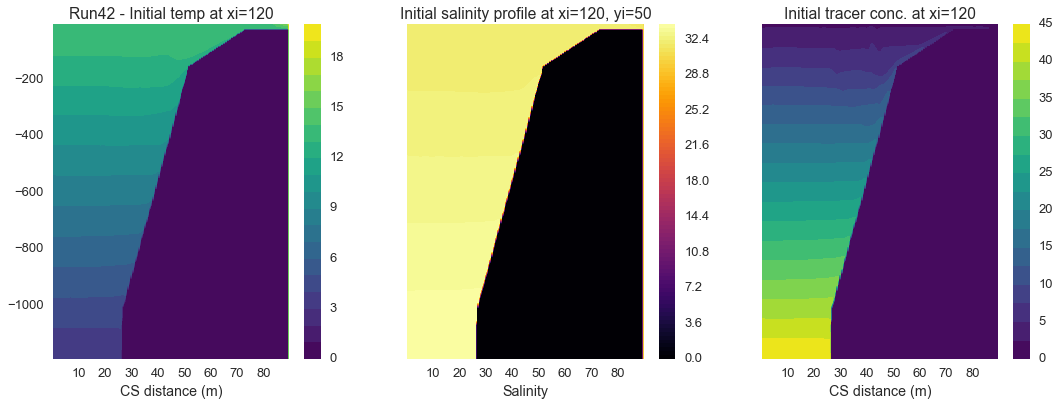

In [9]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_fb,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Run42 - Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Y/1000,grid.RC,S_fb,100, cmap = 'inferno')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_fb,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')


 ###  U and V from TS ini. conditions vs  fixed boundaries 

In [10]:
# fixed bdy case - boundaries on day 3
u_Wbdy_d3 = state_01.U.isel(Xp1=2, T=6)
v_Wbdy_d3 = state_01.V.isel(X=2, T=6)

u_Ebdy_d3 = state_01.U.isel(Xp1=357, T=6)
v_Ebdy_d3 = state_01.V.isel(X=357, T=6)

# fixed bdy case - boundaries on day 6
u_Wbdy_d6 = state_01.U.isel(Xp1=2, T=12)
v_Wbdy_d6 = state_01.V.isel(X=2, T=12)

u_Ebdy_d6 = state_01.U.isel(Xp1=357, T=12)
v_Ebdy_d6 = state_01.V.isel(X=357, T=12)

# fixed bdy case - boundaries on day 9
u_Wbdy_d9 = state_01.U.isel(Xp1=2, T=18)
v_Wbdy_d9 = state_01.V.isel(X=2, T=18)

u_Ebdy_d9 = state_01.U.isel(Xp1=357, T=18)
v_Ebdy_d9 = state_01.V.isel(X=357, T=18)


# fixed bdy case - mid alongshore distance, day 3
u_mid_d3 = state_01.U.isel(Xp1=180, T=6)
v_mid_d3 = state_01.V.isel(X=180, T=6)

# fixed bdy case - mid alongshore distance, day 6
u_mid_d6 = state_01.U.isel(Xp1=180, T=12)
v_mid_d6 = state_01.V.isel(X=180, T=12)

# fixed bdy case - mid alongshore distance, day 9
u_mid_d9 = state_01.U.isel(Xp1=180, T=18)
v_mid_d9 = state_01.V.isel(X=180, T=18)

# fixed boundaries case on day 3
ufb_Wbdy_d3 = state_fb.U.isel(Xp1=2, T=6)
vfb_Wbdy_d3 = state_fb.V.isel(X=2, T=6)

ufb_Ebdy_d3 = state_fb.U.isel(Xp1=357, T=6)
vfb_Ebdy_d3 = state_fb.V.isel(X=357, T=6)

# fixed boundaries case on day 6
ufb_Wbdy_d6 = state_fb.U.isel(Xp1=2, T=12)
vfb_Wbdy_d6 = state_fb.V.isel(X=2, T=12)

ufb_Ebdy_d6 = state_fb.U.isel(Xp1=357, T=12)
vfb_Ebdy_d6 = state_fb.V.isel(X=357, T=12)

# fixed boundaries case on day 9
ufb_Wbdy_d9 = state_fb.U.isel(Xp1=2, T=18)
vfb_Wbdy_d9 = state_fb.V.isel(X=2, T=18)

ufb_Ebdy_d9 = state_fb.U.isel(Xp1=357, T=18)
vfb_Ebdy_d9 = state_fb.V.isel(X=357, T=18)

# fixed boundaries case - mid alongshore distance, day 3
ufb_mid_d3 = state_fb.U.isel(Xp1=180, T=6)
vfb_mid_d3 = state_fb.V.isel(X=180, T=6)

# fixed boundaries case - mid alongshore distance, day 6
ufb_mid_d6 = state_fb.U.isel(Xp1=180, T=12)
vfb_mid_d6 = state_fb.V.isel(X=180, T=12)

# fixed boundaries case - mid alongshore distance, day 9
ufb_mid_d9 = state_fb.U.isel(Xp1=180, T=18)
vfb_mid_d9 = state_fb.V.isel(X=180, T=18)


Day 3 vs day 3


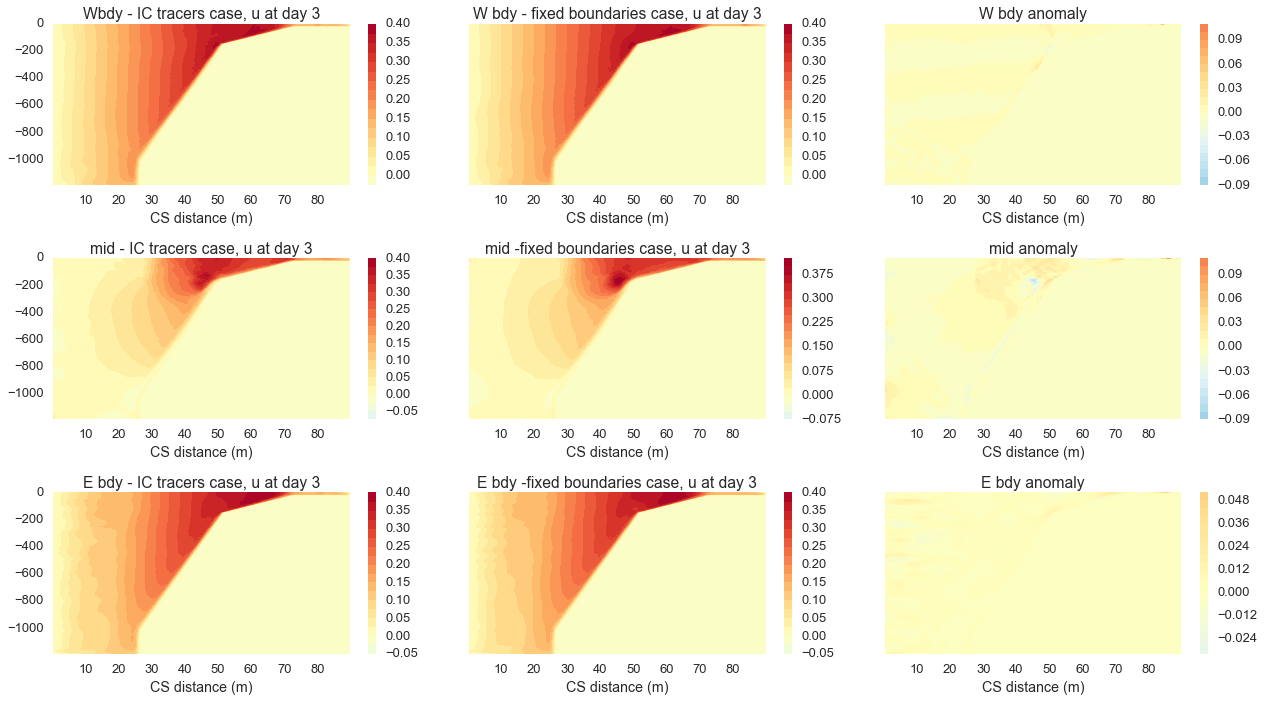

In [13]:
print('Day 3 vs day 3')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Wbdy - IC tracers case, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - IC tracers case, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy - IC tracers case, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ufb_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy - fixed boundaries case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ufb_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -fixed boundaries case, u at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ufb_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -fixed boundaries case, u at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,u_Wbdy_d3-ufb_Wbdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,u_mid_d3-ufb_mid_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,u_Ebdy_d3-ufb_Ebdy_d3,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


Day 6 fixed boundaries vs day 6 IC tracers


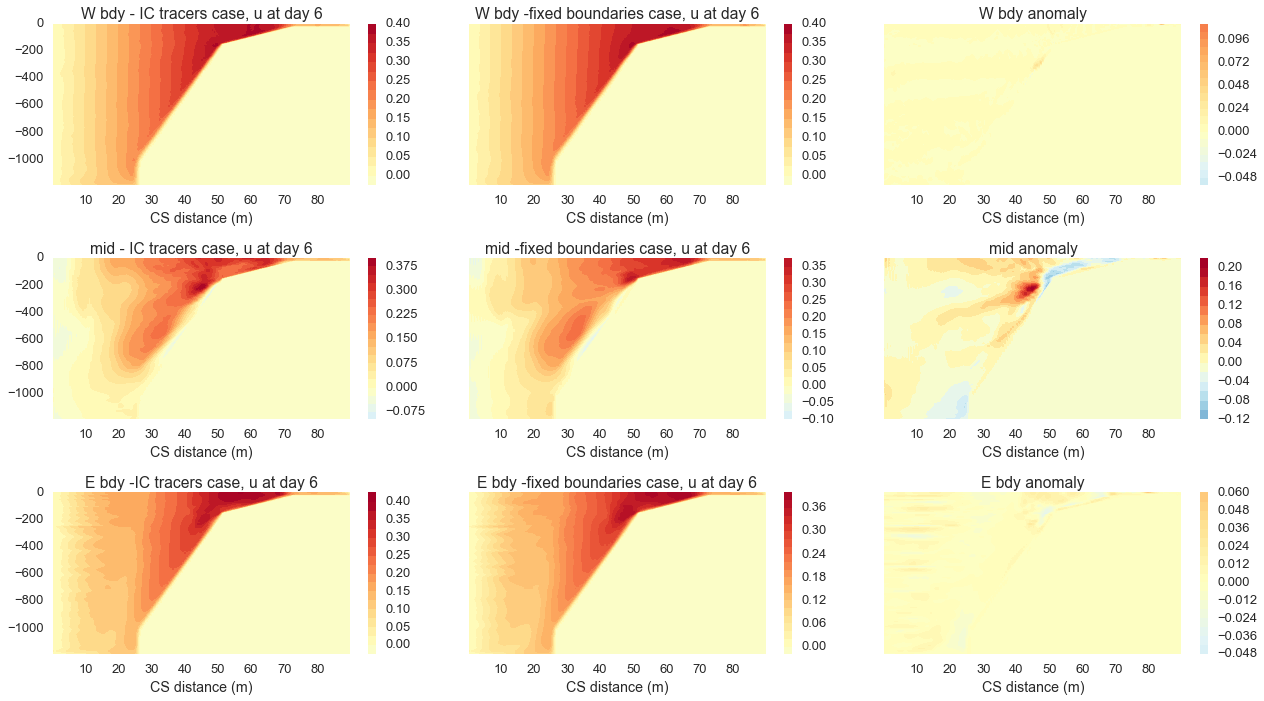

In [14]:
print('Day 6 fixed boundaries vs day 6 IC tracers')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - IC tracers case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - IC tracers case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -IC tracers case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ufb_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -fixed boundaries case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ufb_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -fixed boundaries case, u at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ufb_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -fixed boundaries case, u at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,u_Wbdy_d6-ufb_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,u_mid_d6-ufb_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,u_Ebdy_d6-ufb_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


Day 9 fixed boundaries vs day 9 IC tracers


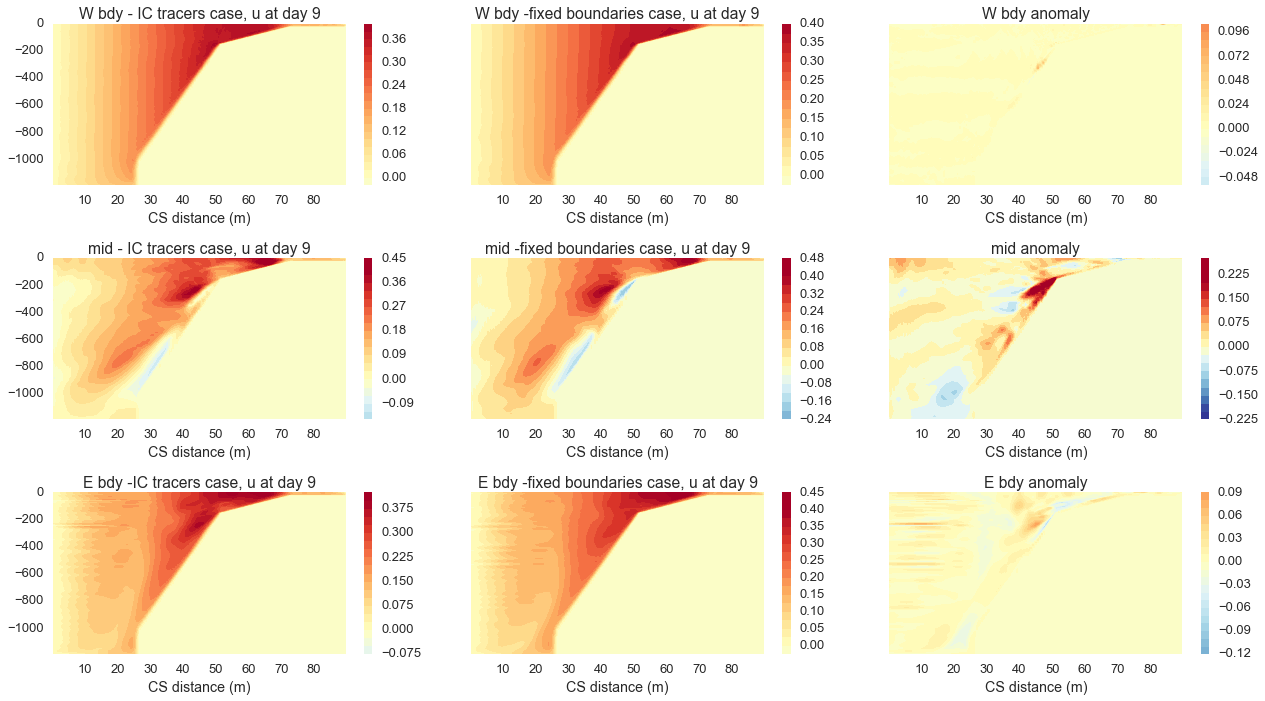

In [15]:
print('Day 9 fixed boundaries vs day 9 IC tracers')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,u_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - IC tracers case, u at day 9')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - IC tracers case, u at day 9')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,u_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -IC tracers case, u at day 9')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ufb_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -fixed boundaries case, u at day 9')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,ufb_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -fixed boundaries case, u at day 9')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,ufb_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.4, vmin = -0.4)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -fixed boundaries case, u at day 9')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,u_Wbdy_d9-ufb_Wbdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,u_mid_d9-ufb_mid_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,u_Ebdy_d9-ufb_Ebdy_d9,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


Day 6 fixed boundaries vs day 6 IC tracers, V


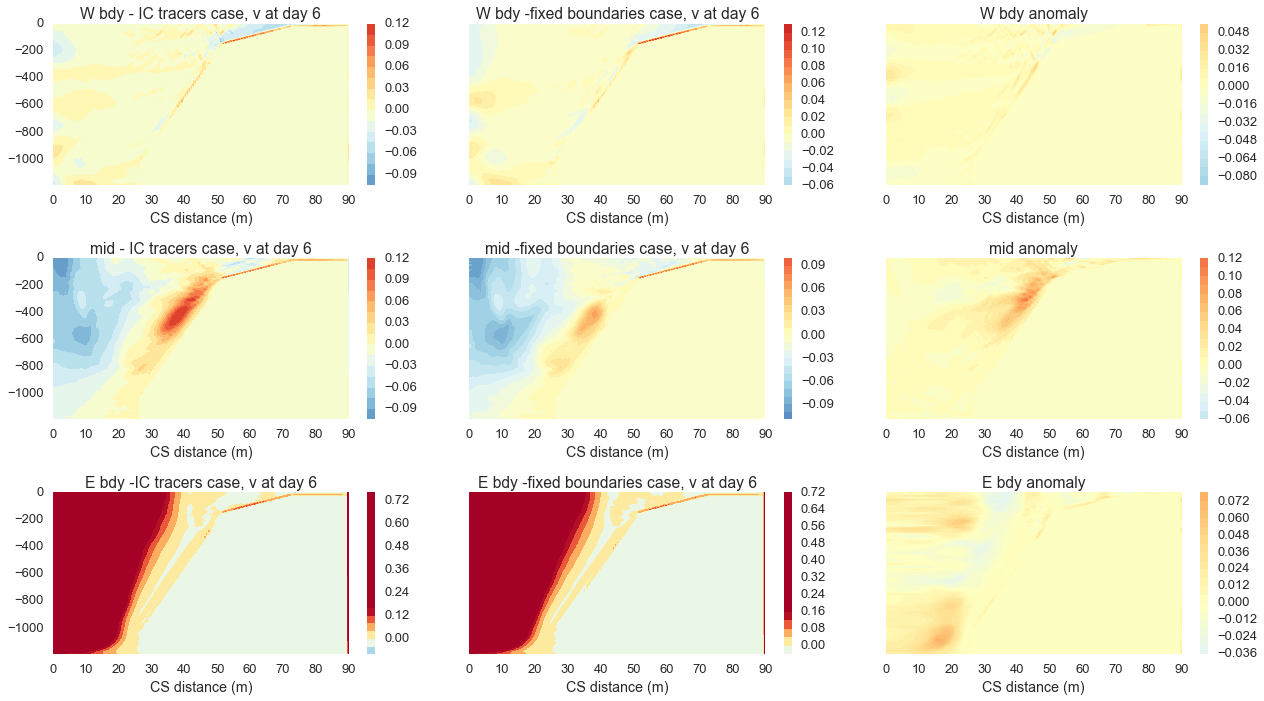

In [16]:
print('Day 6 fixed boundaries vs day 6 IC tracers, V')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - IC tracers case, v at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Yp1/1000,grid.RC,v_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - IC tracers case, v at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -IC tracers case, v at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Yp1/1000,grid.RC,vfb_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -fixed boundaries case, v at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Yp1/1000,grid.RC,vfb_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -fixed boundaries case, v at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Yp1/1000,grid.RC,vfb_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.15, vmin = -0.15)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -fixed boundaries case, v at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Yp1/1000,grid.RC,v_Wbdy_d6-vfb_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Yp1/1000,grid.RC,v_mid_d6-vfb_mid_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Yp1/1000,grid.RC,v_Ebdy_d6-vfb_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 0.2, vmin = -0.2)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


What is this, precious!!??

## Top views of u and v

In [17]:
# fixed bdy case - boundaries on day 3
u_surf_d3 = state_01.U.isel(Z=5, T=6)
v_surf_d3 = state_01.V.isel(Z=5, T=6)

u_shlf_d3 = state_01.U.isel(Z=25, T=6)
v_shlf_d3 = state_01.V.isel(Z=25, T=6)

# fixed bdy case - boundaries on day 6
u_surf_d6 = state_01.U.isel(Z=5, T=12)
v_surf_d6 = state_01.V.isel(Z=5, T=12)

u_shlf_d6 = state_01.U.isel(Z=25, T=12)
v_shlf_d6 = state_01.V.isel(Z=25, T=12)

# fixed bdy case - boundaries on day 9
u_surf_d9 = state_01.U.isel(Z=5, T=18)
v_surf_d9 = state_01.V.isel(Z=5, T=18)

u_shlf_d9 = state_01.U.isel(Z=25, T=18)
v_shlf_d9 = state_01.V.isel(Z=25, T=18)


# fixed bdy case - mid alongshore distance, day 3
u_cny_d3 = state_01.U.isel(Z=32, T=6)
v_cny_d3 = state_01.V.isel(Z=32, T=6)

# fixed bdy case - mid alongshore distance, day 6
u_cny_d6 = state_01.U.isel(Z=32, T=12)
v_cny_d6 = state_01.V.isel(Z=32, T=12)

# fixed bdy case - mid alongshore distance, day 9
u_cny_d9 = state_01.U.isel(Z=32, T=18)
v_cny_d9 = state_01.V.isel(Z=32, T=18)

# fixed boundaries case on day 3
ufb_surf_d3 = state_fb.U.isel(Z=5, T=6)
vfb_surf_d3 = state_fb.V.isel(Z=5, T=6)

ufb_shlf_d3 = state_fb.U.isel(Z=25, T=6)
vfb_shlf_d3 = state_fb.V.isel(Z=25, T=6)

# fixed boundaries case on day 6
ufb_surf_d6 = state_fb.U.isel(Z=5, T=12)
vfb_surf_d6 = state_fb.V.isel(Z=5, T=12)

ufb_shlf_d6 = state_fb.U.isel(Z=25, T=12)
vfb_shlf_d6 = state_fb.V.isel(Z=25, T=12)

# fixed boundaries case on day 9
ufb_surf_d9 = state_fb.U.isel(Z=5, T=18)
vfb_surf_d9 = state_fb.V.isel(Z=5, T=18)

ufb_shlf_d9 = state_fb.U.isel(Z=25, T=18)
vfb_shlf_d9 = state_fb.V.isel(Z=25, T=18)

# fixed boundaries case - mid alongshore distance, day 3
ufb_cny_d3 = state_fb.U.isel(Z=32, T=6)
vfb_cny_d3 = state_fb.V.isel(Z=32, T=6)

# fixed boundaries case - mid alongshore distance, day 6
ufb_cny_d6 = state_fb.U.isel(Z=32, T=12)
vfb_cny_d6 = state_fb.V.isel(Z=32, T=12)

# fixed boundaries case - mid alongshore distance, day 9
ufb_cny_d9 = state_fb.U.isel(Z=32, T=18)
vfb_cny_d9 = state_fb.V.isel(Z=32, T=18)

### U

Day 3 fixed boundaries vs. day 3 IC tracers, top view of U at different z levels


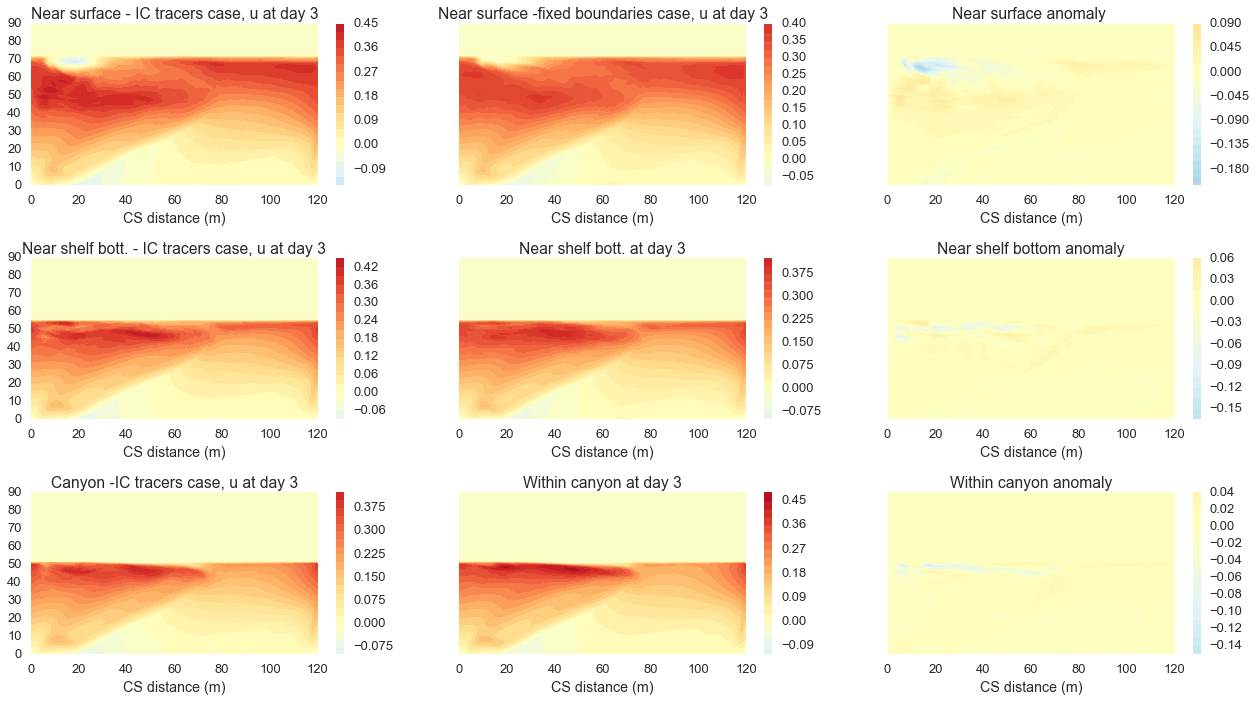

In [20]:
print('Day 3 fixed boundaries vs. day 3 IC tracers, top view of U at different z levels')
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - IC tracers case, u at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf-break - IC tracers case, u at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -IC tracers case, u at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -fixed boundaries case, u at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf-break at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Below shelf-break at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d3-ufb_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d3-ufb_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf break anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d3-ufb_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Below shelf-break anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

Day 6 fixed boundaries vs. day 6 IC tracers, top view of U at different z levels


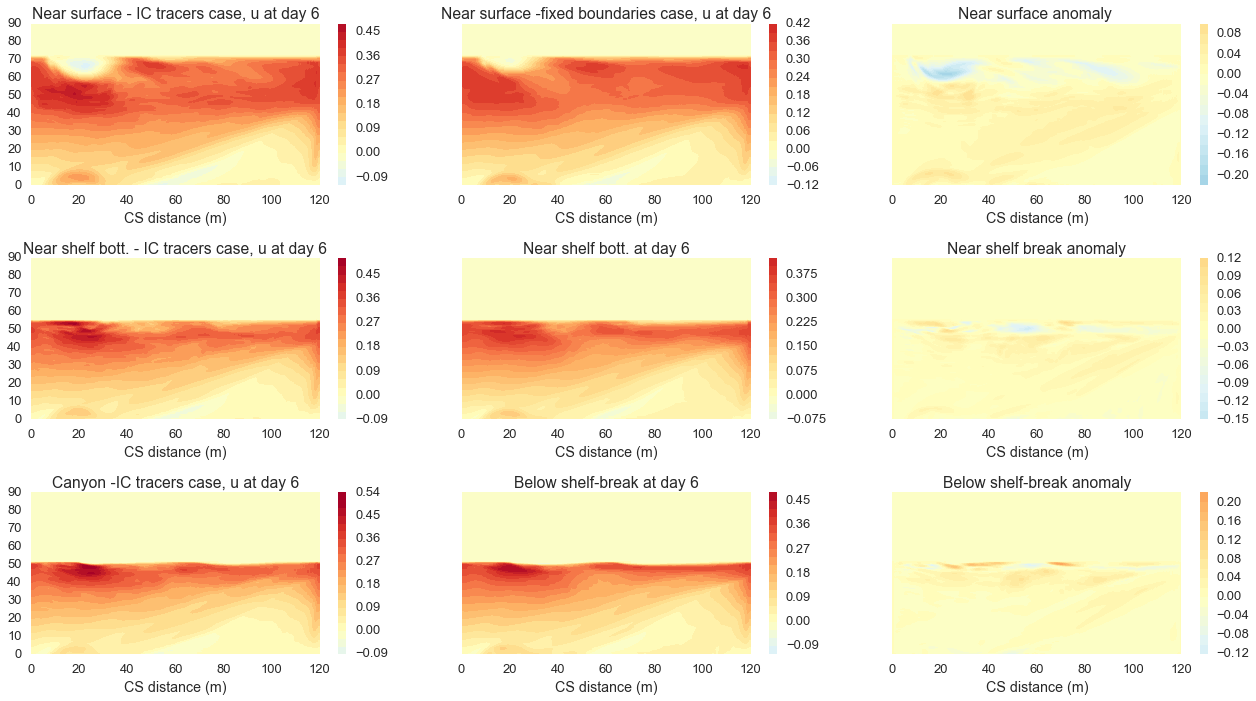

In [22]:
print('Day 6 fixed boundaries vs. day 6 IC tracers, top view of U at different z levels')

sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - IC tracers case, u at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf-break - IC tracers case, u at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -IC tracers case, u at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -fixed boundaries case, u at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf-break at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Below shelf-break at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d6-ufb_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d6-ufb_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf break anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d6-ufb_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Below shelf-break anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

Day 9 fixed boundaries vs. day 9 IC tracers, top view of U at different z levels


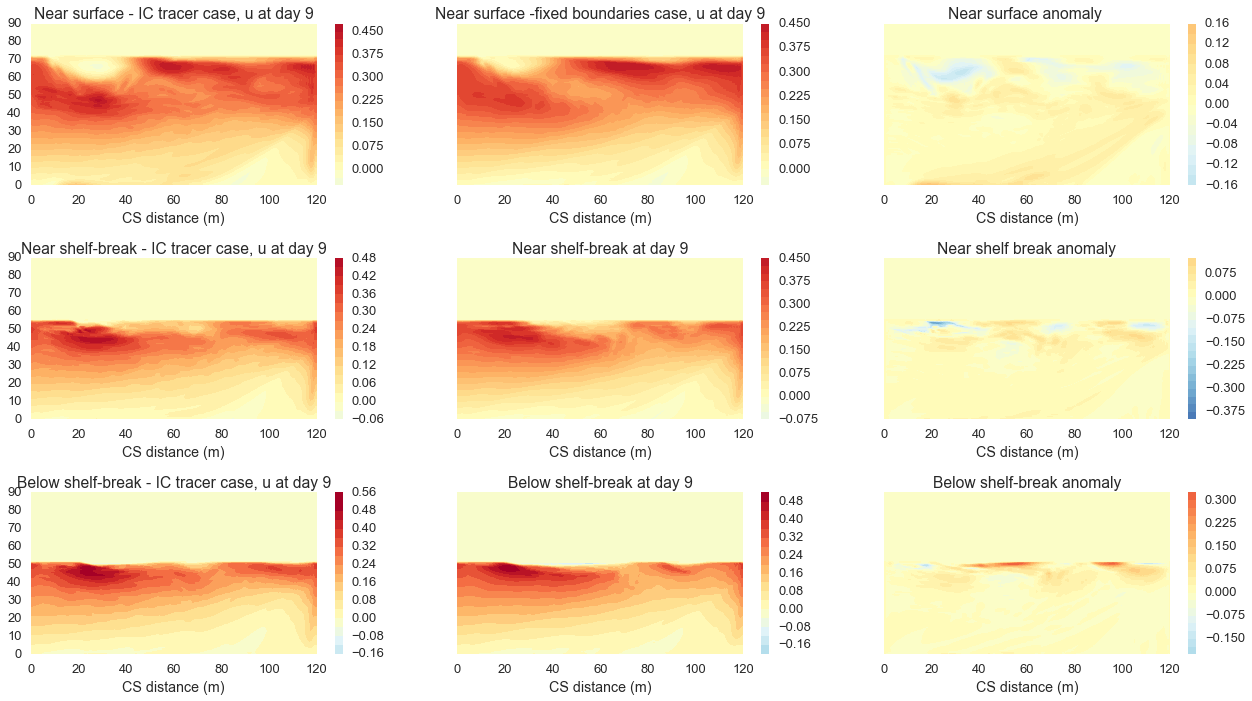

In [23]:
print('Day 9 fixed boundaries vs. day 9 IC tracers, top view of U at different z levels')

sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - IC tracer case, u at day 9')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf-break - IC tracer case, u at day 9')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Below shelf-break - IC tracer case, u at day 9')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -fixed boundaries case, u at day 9')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf-break at day 9')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Xp1/1000,grid.Y/1000,ufb_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Below shelf-break at day 9')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.Xp1/1000,grid.Y/1000,u_surf_d9-ufb_surf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Xp1/1000,grid.Y/1000,u_shlf_d9-ufb_shlf_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf break anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Xp1/1000,grid.Y/1000,u_cny_d9-ufb_cny_d9,20, cmap = 'RdYlBu_r', vmax = 0.5, vmin = -0.5)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Below shelf-break anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

### V

Day 3 fixed boundaries vs day 3 IC tracers, V


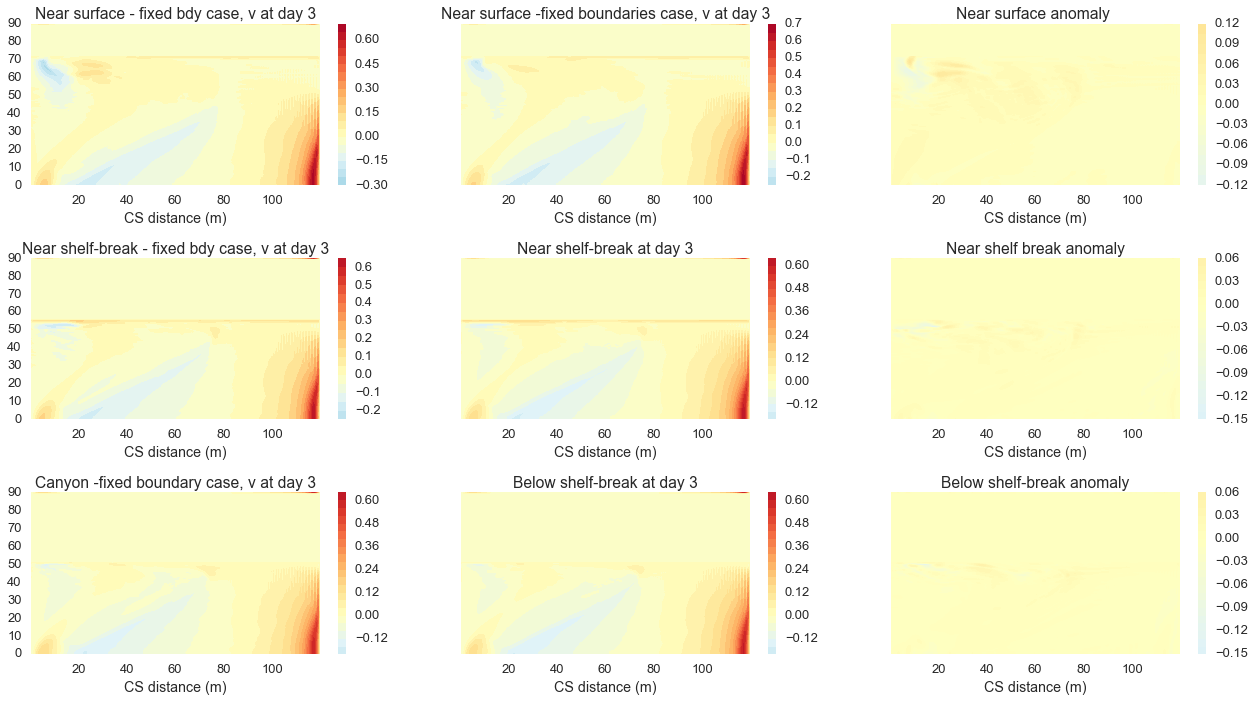

In [26]:
print('Day 3 fixed boundaries vs day 3 IC tracers, V')

sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - fixed bdy case, v at day 3')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf-break - fixed bdy case, v at day 3')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon -fixed boundary case, v at day 3')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -fixed boundaries case, v at day 3')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf-break at day 3')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Below shelf-break at day 3')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d3-vfb_surf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d3-vfb_shlf_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf break anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d3-vfb_cny_d3,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Below shelf-break anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()

Day 6 fixed boundaries vs day 6 IC tracers, V


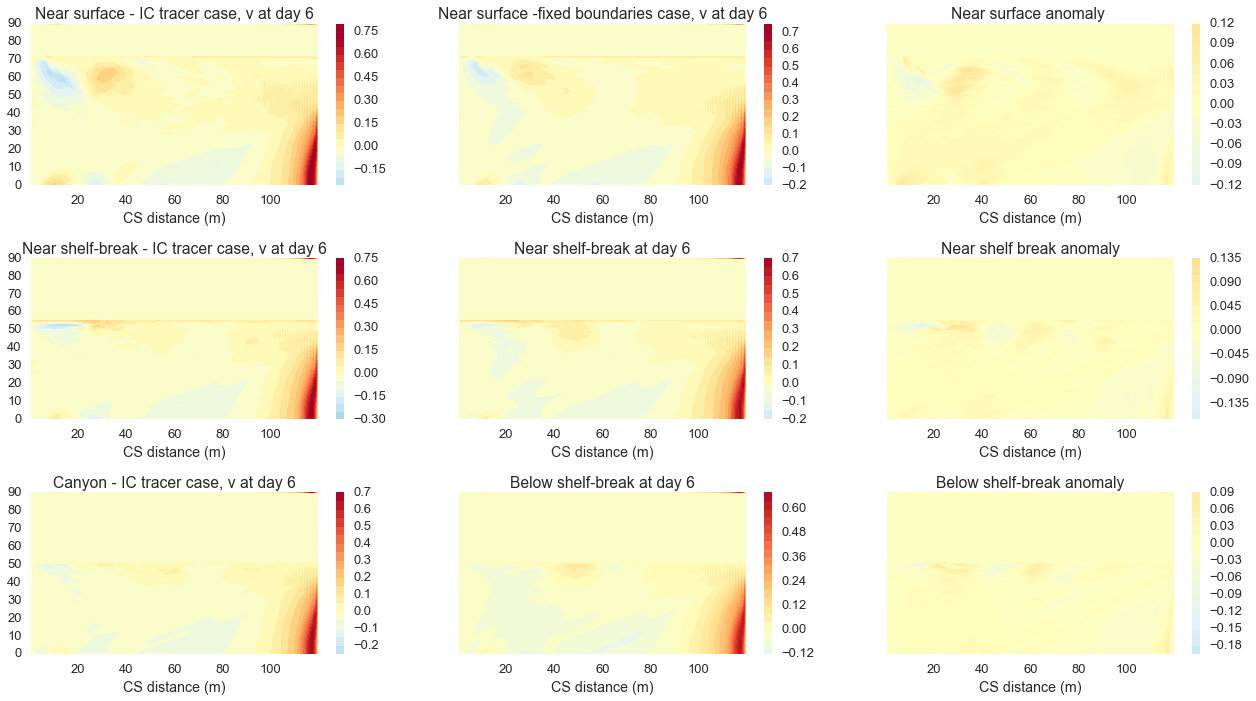

In [27]:
print('Day 6 fixed boundaries vs day 6 IC tracers, V')

sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Near surface - IC tracer case, v at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Near shelf-break - IC tracer case, v at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Canyon - IC tracer case, v at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('Near surface -fixed boundaries case, v at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('Near shelf-break at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.X/1000,grid.Yp1/1000,vfb_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('Below shelf-break at day 6')
ax[2,1].set_xlabel('CS distance (m)')

cf7 = ax[0,2].contourf(grid.X/1000,grid.Yp1/1000,v_surf_d6-vfb_surf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('Near surface anomaly ')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.X/1000,grid.Yp1/1000,v_shlf_d6-vfb_shlf_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('Near shelf break anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.X/1000,grid.Yp1/1000,v_cny_d6-vfb_cny_d6,20, cmap = 'RdYlBu_r', vmax = 0.7, vmin = -0.7)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('Below shelf-break anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()


## Tracers

In [28]:
# fixed bdy case - day 3
T_Wbdy_d3 = state_01.Temp.isel(X=2, T=6)
S_Wbdy_d3 = state_01.S.isel(X=2, T=6)
Tr_Wbdy_d3 = ptracers_01.Tr1.isel(X=2, T=6)

T_Ebdy_d3 = state_01.Temp.isel(X=357, T=6)
S_Ebdy_d3 = state_01.S.isel(X=357, T=6)
Tr_Ebdy_d3 = ptracers_01.Tr1.isel(X=357, T=6)

T_mid_d3 = state_01.Temp.isel(X=180, T=6)
S_mid_d3 = state_01.S.isel(X=180, T=6)
Tr_mid_d3 = ptracers_01.Tr1.isel(X=180, T=6)

# fixed bdy case - day 6
T_Wbdy_d6 = state_01.Temp.isel(X=2, T=12)
S_Wbdy_d6 = state_01.S.isel(X=2, T=12)
Tr_Wbdy_d6 = ptracers_01.Tr1.isel(X=2, T=12)

T_Ebdy_d6 = state_01.Temp.isel(X=357, T=12)
S_Ebdy_d6 = state_01.S.isel(X=357, T=12)
Tr_Ebdy_d6 = ptracers_01.Tr1.isel(X=357, T=12)

T_mid_d6 = state_01.Temp.isel(X=180, T=12)
S_mid_d6 = state_01.S.isel(X=180, T=12)
Tr_mid_d6 = ptracers_01.Tr1.isel(X=180, T=12)

# fixed bdy case -  day 9
T_Wbdy_d9 = state_01.Temp.isel(X=2, T=18)
S_Wbdy_d9 = state_01.S.isel(X=2, T=18)
Tr_Wbdy_d9 = ptracers_01.Tr1.isel(X=2, T=18)

T_Ebdy_d9 = state_01.Temp.isel(X=357, T=18)
S_Ebdy_d9 = state_01.S.isel(X=357, T=18)
Tr_Ebdy_d9 = ptracers_01.Tr1.isel(X=357, T=18)

T_mid_d9 = state_01.Temp.isel(X=180, T=18)
S_mid_d9 = state_01.S.isel(X=180, T=18)
Tr_mid_d9 = ptracers_01.Tr1.isel(X=180, T=18)


In [29]:
# fb case -  day 6
Tfb_Wbdy_d6 = state_fb.Temp.isel(X=2, T=12)
Sfb_Wbdy_d6 = state_fb.S.isel(X=2, T=12)
Trfb_Wbdy_d6 = ptracers_fb.Tr1.isel(X=2, T=12)

Tfb_Ebdy_d6 = state_fb.Temp.isel(X=357, T=12)
Sfb_Ebdy_d6 = state_fb.S.isel(X=357, T=12)
Trfb_Ebdy_d6 = ptracers_fb.Tr1.isel(X=357, T=12)

Tfb_mid_d6 = state_fb.Temp.isel(X=180, T=12)
Sfb_mid_d6 = state_fb.S.isel(X=180, T=12)
Trfb_mid_d6 = ptracers_fb.Tr1.isel(X=180, T=12)

#  fb -  day 9
Tfb_Wbdy_d9 = state_fb.Temp.isel(X=2, T=18)
Sfb_Wbdy_d9 = state_fb.S.isel(X=2, T=18)
Trfb_Wbdy_d9 = ptracers_fb.Tr1.isel(X=2, T=18)

Tfb_Ebdy_d9 = state_fb.Temp.isel(X=357, T=18)
Sfb_Ebdy_d9 = state_fb.S.isel(X=357, T=18)
Trfb_Ebdy_d9 = ptracers_fb.Tr1.isel(X=357, T=18)

Tfb_mid_d9 = state_fb.Temp.isel(X=180, T=18)
Sfb_mid_d9 = state_fb.S.isel(X=180, T=18)
Trfb_mid_d9 = ptracers_fb.Tr1.isel(X=180, T=18)


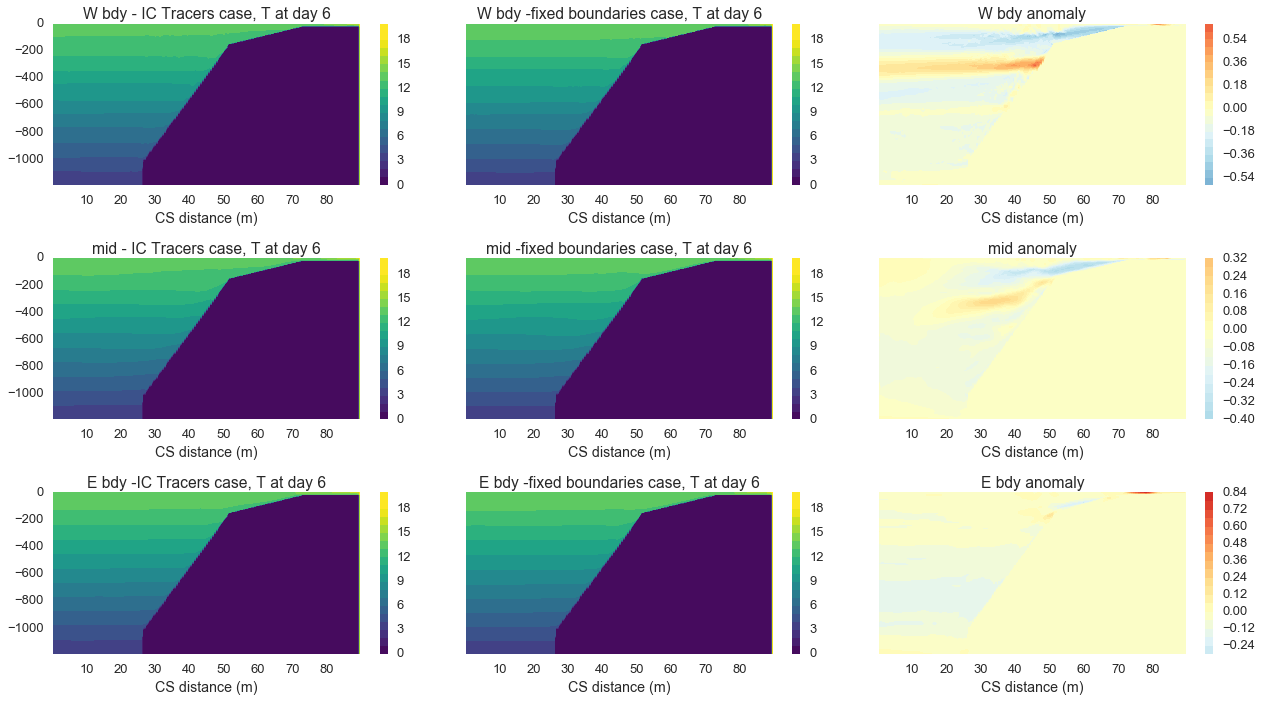

In [30]:
sns.set_context('talk')
fig,ax = plt.subplots(3,3,figsize=(18,10), sharey = True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,T_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('W bdy - IC Tracers case, T at day 6')
ax[0,0].set_xlabel('CS distance (m)')

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,T_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('mid - IC Tracers case, T at day 6')
ax[1,0].set_xlabel('CS distance (m)')

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,T_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('E bdy -IC Tracers case, T at day 6')
ax[2,0].set_xlabel('CS distance (m)')

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,Tfb_Wbdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('W bdy -fixed boundaries case, T at day 6')
ax[0,1].set_xlabel('CS distance (m)')

cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,Tfb_mid_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('mid -fixed boundaries case, T at day 6')
ax[1,1].set_xlabel('CS distance (m)')

cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,Tfb_Ebdy_d6,20, cmap = 'viridis', vmax = 18, vmin = 0)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('E bdy -fixed boundaries case, T at day 6')
ax[2,1].set_xlabel('CS distance (m)')


cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,T_Wbdy_d6-Tfb_Wbdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('W bdy anomaly')
ax[0,2].set_xlabel('CS distance (m)')

cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,T_mid_d6-Tfb_mid_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('mid anomaly')
ax[1,2].set_xlabel('CS distance (m)')

cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,T_Ebdy_d6-Tfb_Ebdy_d6,20, cmap = 'RdYlBu_r', vmax = 1, vmin = -1)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('E bdy anomaly')
ax[2,2].set_xlabel('CS distance (m)')


plt.tight_layout()
